Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
tf.__version__

import cv2

%matplotlib inline
sns.set(color_codes=True)

Loading the Data

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'

Mounted at /content/gdrive


In [ ]:
dataset_file = root_path + 'Part- 1 - Signal.csv'

In [ ]:
df = pd.read_csv(dataset_file)

In [ ]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print('The size of the data:', df.size)
print('No of rows in the data:', df.shape[0])
print('No of columns in the data:', df.shape[1])

The size of the data: 19188
No of rows in the data: 1599
No of columns in the data: 12


Data Preprocessing

In [ ]:
df1=df.copy(deep=True)

In [ ]:
df1 = df1._convert(numeric=True)

In [ ]:
df1.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [ ]:
(df1==0).all()

Parameter 1        False
Parameter 2        False
Parameter 3        False
Parameter 4        False
Parameter 5        False
Parameter 6        False
Parameter 7        False
Parameter 8        False
Parameter 9        False
Parameter 10       False
Parameter 11       False
Signal_Strength    False
dtype: bool

Data Visualization and analysing

In [ ]:
correlation_values=df1.corr()['Signal_Strength']
correlation_values.abs().sort_values(ascending=False)

Signal_Strength    1.000000
Parameter 11       0.476166
Parameter 2        0.390558
Parameter 10       0.251397
Parameter 3        0.226373
Parameter 7        0.185100
Parameter 8        0.174919
Parameter 5        0.128907
Parameter 1        0.124052
Parameter 9        0.057731
Parameter 6        0.050656
Parameter 4        0.013732
Name: Signal_Strength, dtype: float64

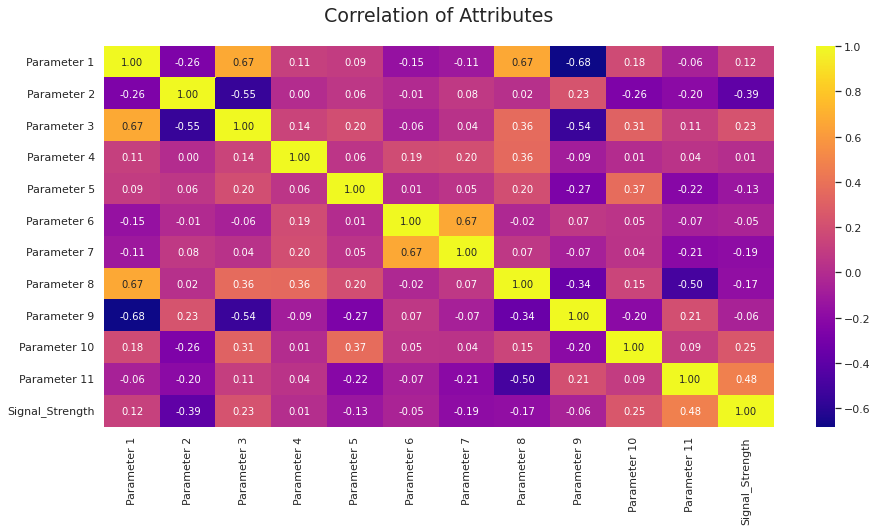

In [ ]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df1.corr(), cmap='plasma',annot=True, fmt='.2f')

In [ ]:
df1.nunique()

Parameter 1         96
Parameter 2        143
Parameter 3         80
Parameter 4         91
Parameter 5        153
Parameter 6         60
Parameter 7        144
Parameter 8        436
Parameter 9         89
Parameter 10        96
Parameter 11        65
Signal_Strength      6
dtype: int64

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
five_point=df1.describe().T
five_point[['min','25%','50%','75%','max']]

,min,25%,50%,75%,max
Parameter 1,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,0.33000,0.5500,0.62000,0.730000,2.00000


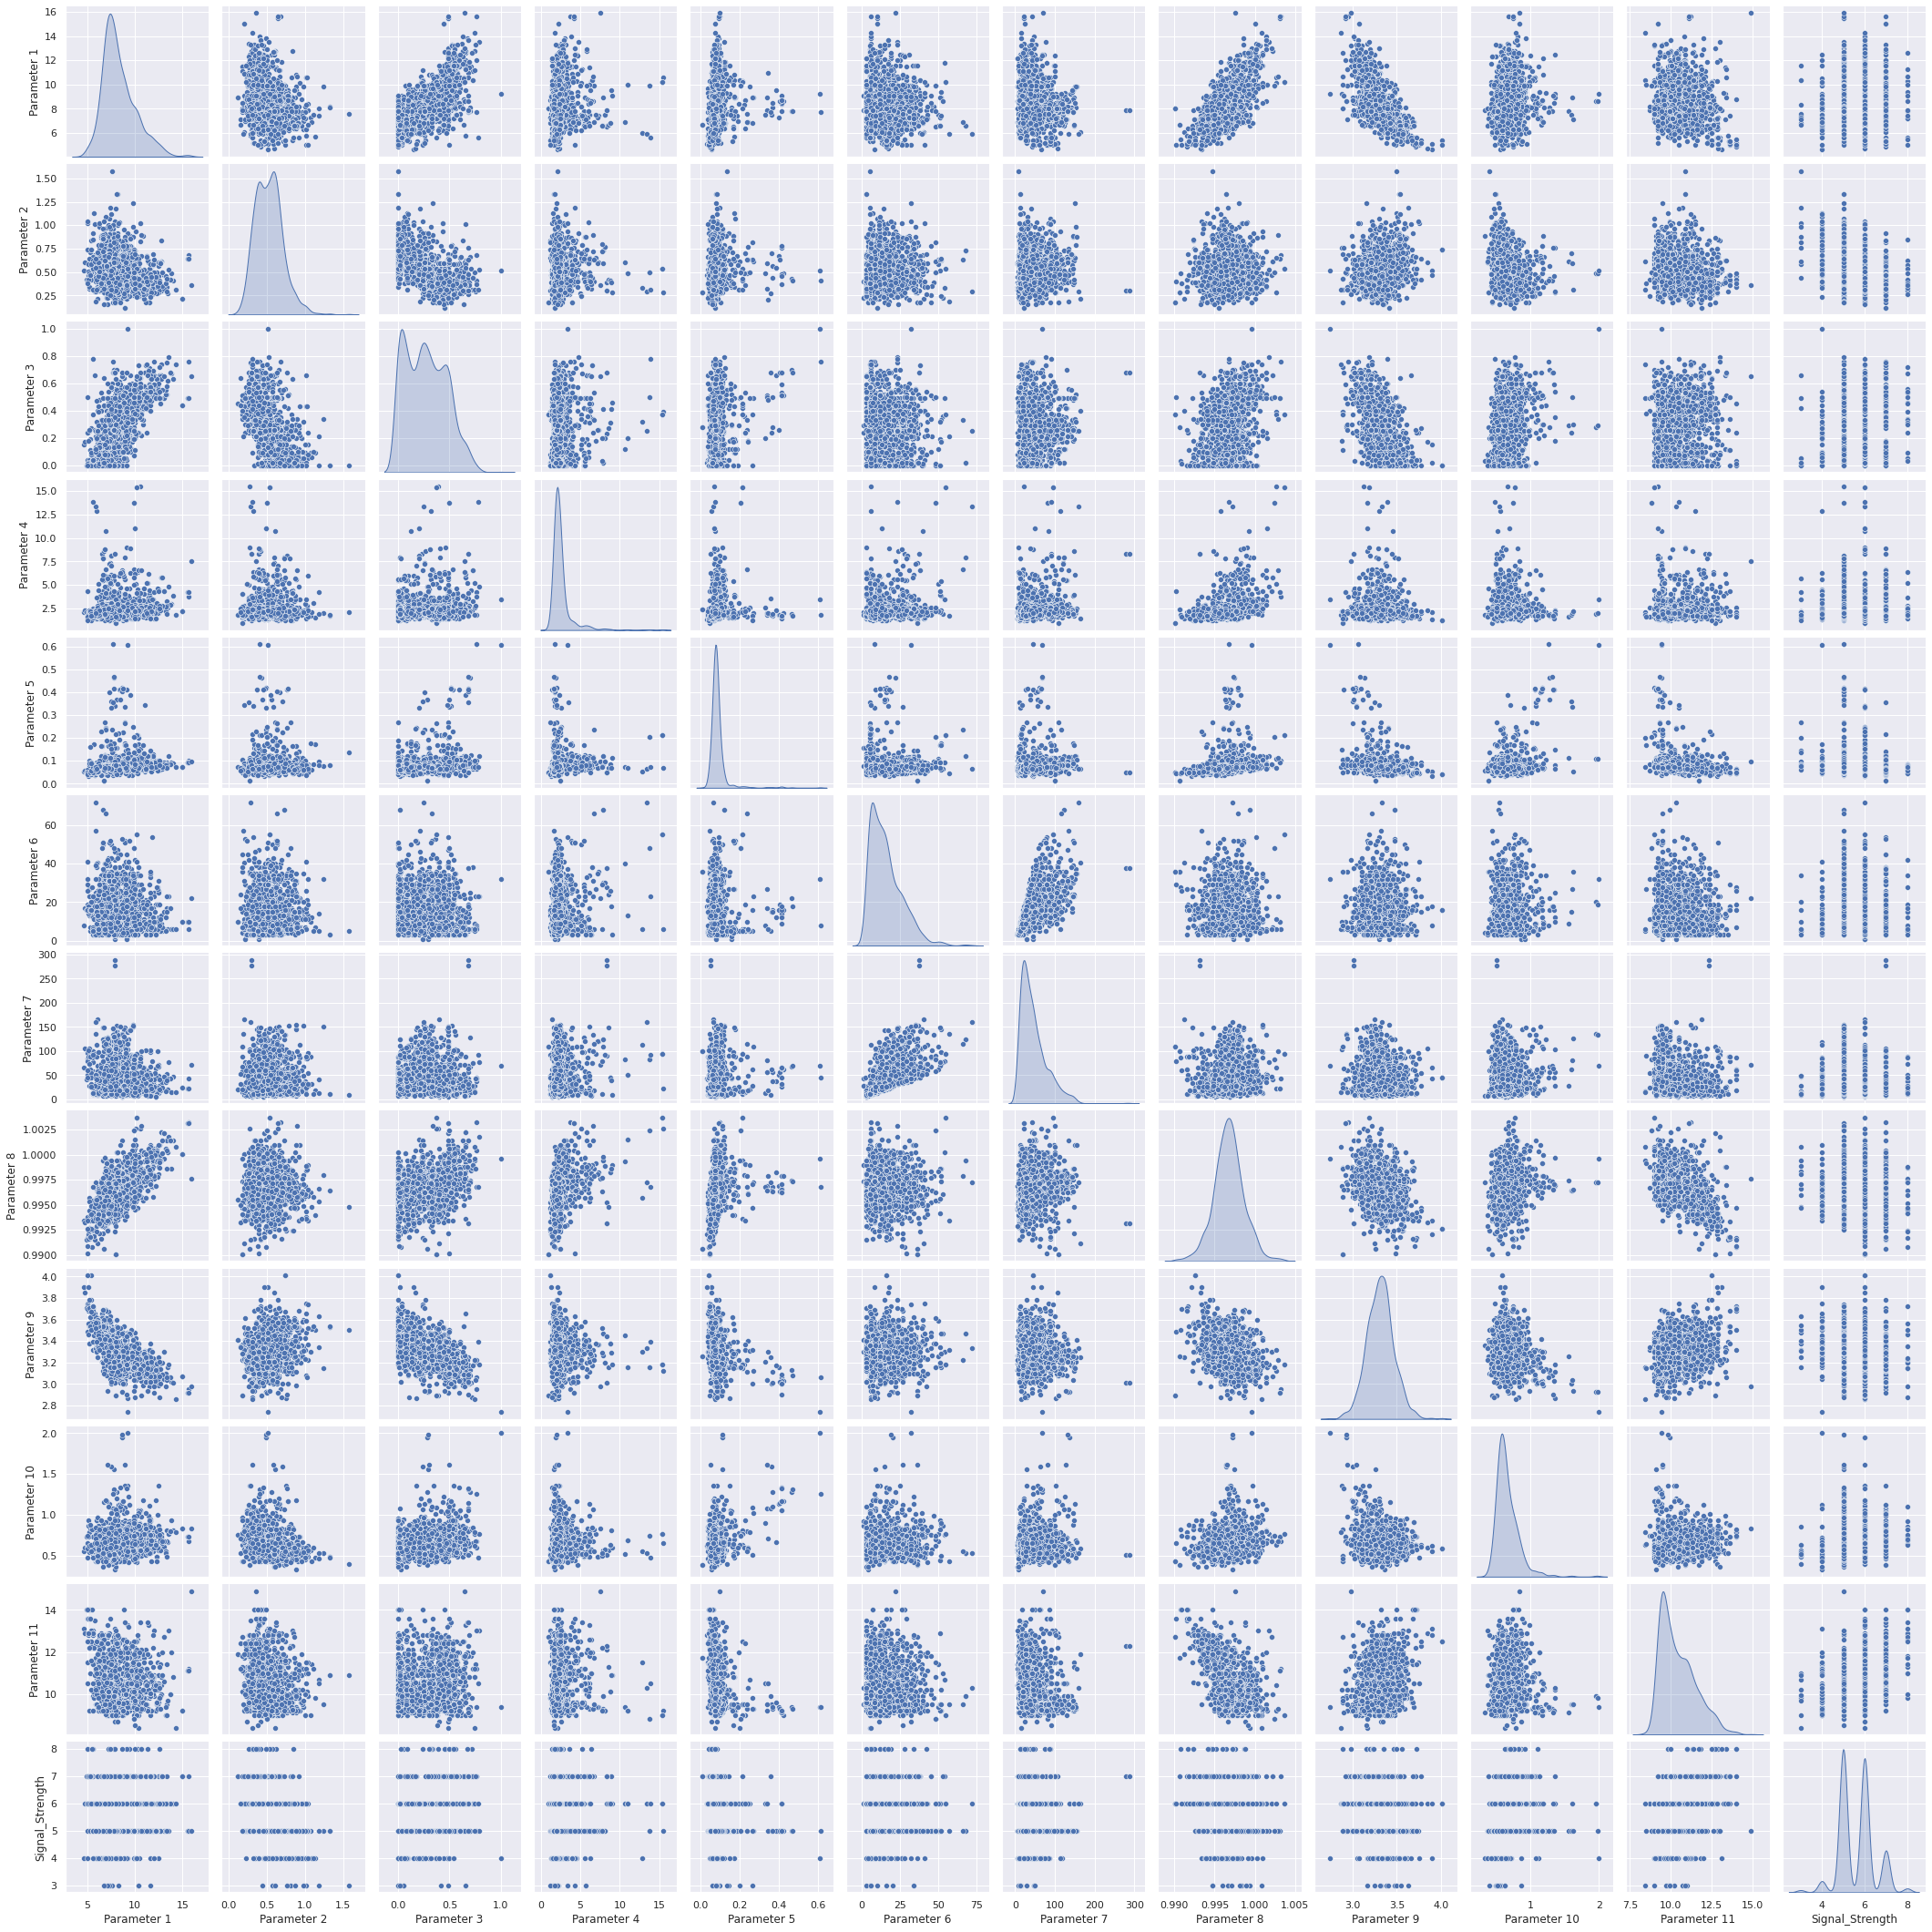

In [ ]:
sns.pairplot(df1, diag_kind='kde');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


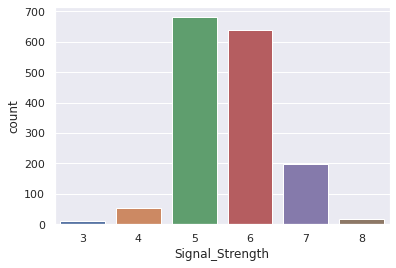

In [ ]:
sns.countplot(df1['Signal_Strength']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


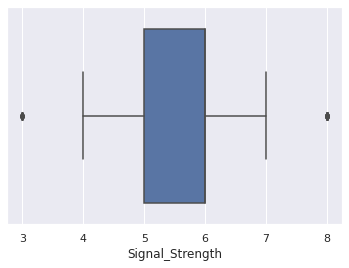

In [ ]:
sns.boxplot(df1['Signal_Strength']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


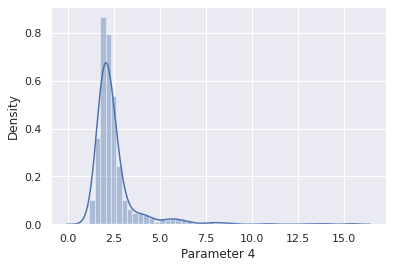

In [ ]:
sns.distplot(df1['Parameter 4']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


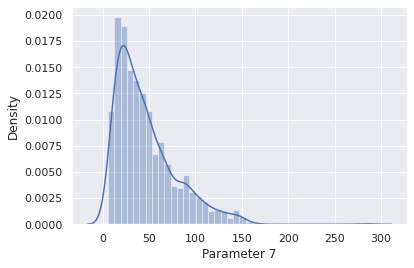

In [ ]:
sns.distplot(df1['Parameter 7']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


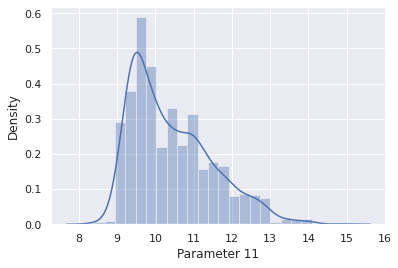

In [ ]:
sns.distplot(df1['Parameter 11']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


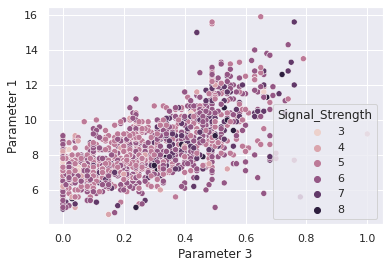

In [ ]:
sns.scatterplot(df1['Parameter 3'],df1['Parameter 1'], hue=df1['Signal_Strength']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


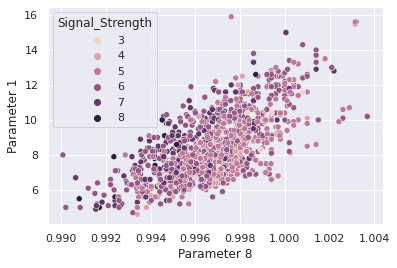

In [ ]:
sns.scatterplot(df1['Parameter 8'],df1['Parameter 1'], hue=df1['Signal_Strength']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


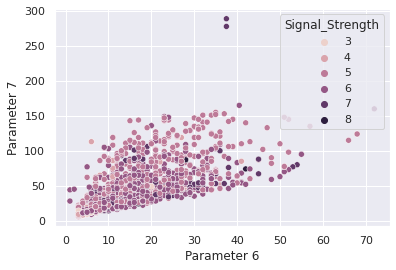

In [ ]:
sns.scatterplot(df1['Parameter 6'],df1['Parameter 7'], hue=df1['Signal_Strength']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


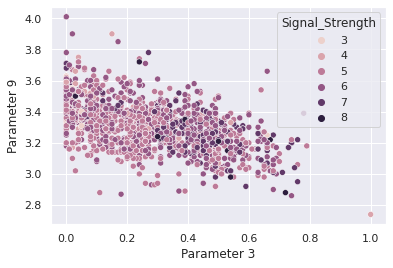

In [ ]:
sns.scatterplot(df1['Parameter 3'],df1['Parameter 9'], hue=df1['Signal_Strength']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


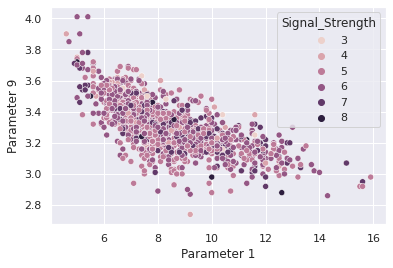

In [ ]:
sns.scatterplot(df1['Parameter 1'],df1['Parameter 9'], hue=df1['Signal_Strength']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


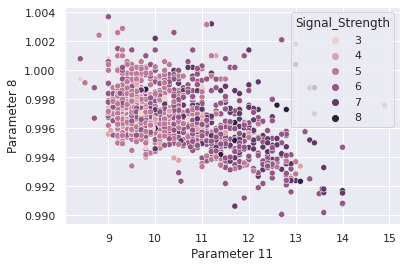

In [ ]:
sns.scatterplot(df1['Parameter 11'],df1['Parameter 8'], hue=df1['Signal_Strength']);

As per the above graps and plots we see the below finddings:


1. Signal strengths 5 & 6 have the highest counts
2. Parameters 5, 6, 7 & 11 are right skewed.

3. Parameters 1 & 3, 1 & 8 and 6 & 7 have strong positive correlation with one another.
4. Parameters 3 & 9, 1 & 9 and 8 & 11 have negative correlation with one another.


Applying Regression

In [ ]:
x=df1.iloc[:,0:11]
y=df1[['Signal_Strength']]

In [ ]:
print('The size of the data:', x.shape)
print('The size of the data:', y.shape)

The size of the data: (1599, 11)
The size of the data: (1599, 1)


In [ ]:
x=x.to_numpy()
y=y.to_numpy()

Creating a model and running it

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.BatchNormalization(input_shape=(11,)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(16,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1,activation=tf.nn.relu)
                                   ])

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
history=model.fit(x, y, epochs=200, validation_split=0.10)

Epoch 1/200
45/45 [==============================] - 1s 6ms/step - loss: 19.6820 - val_loss: 8.2471
Epoch 2/200
45/45 [==============================] - 0s 2ms/step - loss: 3.1964 - val_loss: 9.5370
Epoch 3/200
45/45 [==============================] - 0s 2ms/step - loss: 1.9495 - val_loss: 1.8796
Epoch 4/200
45/45 [==============================] - 0s 2ms/step - loss: 1.5404 - val_loss: 1.7916
Epoch 5/200
45/45 [==============================] - 0s 2ms/step - loss: 1.3491 - val_loss: 2.1890
Epoch 6/200
45/45 [==============================] - 0s 2ms/step - loss: 1.1295 - val_loss: 2.1420
Epoch 7/200
45/45 [==============================] - 0s 2ms/step - loss: 1.0004 - val_loss: 1.9064
Epoch 8/200
45/45 [==============================] - 0s 2ms/step - loss: 0.8200 - val_loss: 1.4253
Epoch 9/200
45/45 [==============================] - 0s 2ms/step - loss: 0.7093 - val_loss: 1.2094
Epoch 10/200
45/45 [==============================] - 0s 2ms/step - loss: 0.6386 - val_loss: 0.8718
Epoch 11

Plotting the loss vs epoch graph

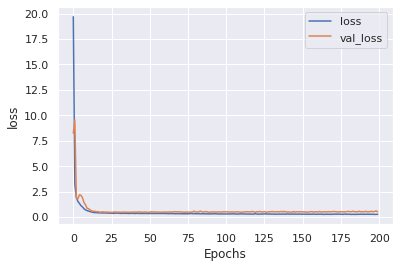

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


plot_graphs(history, 'loss')

Sample test data

In [ ]:
test_x = np.reshape([10.8, 0.59,0, 3.5, 0.05, 18,108, 0.9, 3.4, 0.5,9.1],(-1, 11))

In [ ]:
test_y = model.predict(test_x)

print(test_y)

[[8.027101]]


Saving the model

In [ ]:
model.save("Regression_model")

INFO:tensorflow:Assets written to: Regression_model/assets


Classification model

In [ ]:
x=df1.iloc[:,0:11]
y=df1[['Signal_Strength']]

In [ ]:
x.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
y.head()

,Signal_Strength
0,5
1,5
2,5
3,6
4,5


In [ ]:
x=x.to_numpy()
y=y.to_numpy()

One hot encoding the target variable

In [ ]:
y[3]

array([6])

In [ ]:
y_new=tf.keras.utils.to_categorical(y, num_classes=10)

In [ ]:
y_new[3]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Creating a model and running it

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.BatchNormalization(input_shape=(11,)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                   ])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

In [ ]:
history=model.fit(x,y, epochs=500,validation_split=0.10,batch_size=1000, verbose= 1)

Epoch 1/500
2/2 [==============================] - 1s 147ms/step - loss: 2.4747 - accuracy: 0.0403 - val_loss: 4.4736 - val_accuracy: 0.0000e+00
Epoch 2/500
2/2 [==============================] - 0s 21ms/step - loss: 2.4529 - accuracy: 0.0431 - val_loss: 3.9222 - val_accuracy: 0.0000e+00
Epoch 3/500
2/2 [==============================] - 0s 21ms/step - loss: 2.4305 - accuracy: 0.0514 - val_loss: 3.6477 - val_accuracy: 0.0000e+00
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 2.4100 - accuracy: 0.0542 - val_loss: 3.4689 - val_accuracy: 0.0000e+00
Epoch 5/500
2/2 [==============================] - 0s 22ms/step - loss: 2.3912 - accuracy: 0.0591 - val_loss: 3.3368 - val_accuracy: 0.0000e+00
Epoch 6/500
2/2 [==============================] - 0s 20ms/step - loss: 2.3732 - accuracy: 0.0667 - val_loss: 3.2301 - val_accuracy: 0.0000e+00
Epoch 7/500
2/2 [==============================] - 0s 19ms/step - loss: 2.3563 - accuracy: 0.0757 - val_loss: 3.1387 - val_accuracy: 0.

Plotting Accuracy vs epoch and Loss vs epoch graph

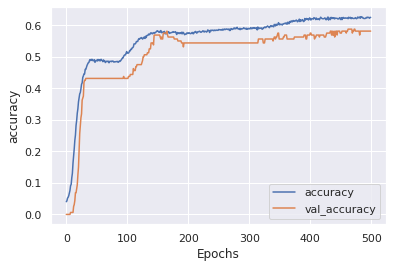

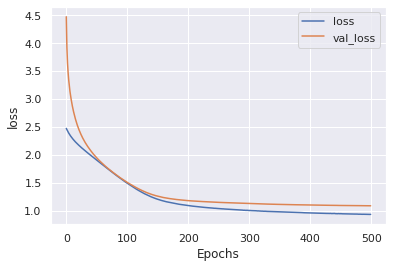

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Saving the model

In [ ]:
model.save("Classification_model")

INFO:tensorflow:Assets written to: Classification_model/assets
